In [1]:
import matplotlib
import uproot, uproot3
import numpy
import awkward
import numba
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
from tqdm import trange
import ROOT
import os,sys
from array import array
import time

Welcome to JupyROOT 6.22/06


## Lumi

In [2]:
# CMS_lumi
#   Initiated by: Gautier Hamel de Monchenault (Saclay)
#   Translated in Python by: Joshua Hardenbrook (Princeton)
#   Updated by:   Dinko Ferencek (Rutgers)
#

cmsText     = "CMS";
cmsTextFont   = 62  

writeExtraText = True
extraText   = "Preliminary"
extraTextFont = 52 

lumiTextSize     = 0.5
lumiTextOffset   = 0.2

cmsTextSize      = 0.45
cmsTextOffset    = 0.1

relPosX    = 0.045
relPosY    = 0.035
relExtraDY = 1.2

extraOverCmsTextSize  = 0.76

lumi_13TeV = "20.1 fb^{-1}"
lumi_8TeV  = "19.7 fb^{-1}" 
lumi_7TeV  = "5.1 fb^{-1}"
lumi_sqrtS = "59.7 fb^{-1} (13 TeV)"

drawLogo      = False

def CMS_lumi(pad,  iPeriod,  iPosX ):
    outOfFrame    = False
    if(iPosX/10==0 ): outOfFrame = True

    alignY_=3
    alignX_=2
    if( iPosX/10==0 ): alignX_=1
    if( iPosX==0    ): alignY_=1
    if( iPosX/10==1 ): alignX_=1
    if( iPosX/10==2 ): alignX_=2
    if( iPosX/10==3 ): alignX_=3
    align_ = 10*alignX_ + alignY_

    H = pad.GetWh()
    W = pad.GetWw()
    l = pad.GetLeftMargin()
    t = pad.GetTopMargin()
    r = pad.GetRightMargin()
    b = pad.GetBottomMargin()
    e = 0.025

    pad.cd()

    lumiText = ""
    if( iPeriod==1 ):
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==2 ):
        lumiText += lumi_8TeV
        lumiText += " (8 TeV)"

    elif( iPeriod==3 ):      
        lumiText = lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==4 ):
        lumiText += lumi_13TeV
        lumiText += " (13 TeV)"
    elif ( iPeriod==7 ):
        if( outOfFrame ):lumiText += "#scale[0.85]{"
        lumiText += lumi_13TeV 
        lumiText += " (13 TeV)"
        lumiText += " + "
        lumiText += lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
        if( outOfFrame): lumiText += "}"
    elif ( iPeriod==12 ):
        lumiText += "8 TeV"
    elif ( iPeriod==0 ):
        lumiText += lumi_sqrtS
            
    print (lumiText)

    latex = ROOT.TLatex()
    latex.SetNDC()
    latex.SetTextAngle(0)
    latex.SetTextColor(ROOT.kBlack)    
    
    extraTextSize = extraOverCmsTextSize*cmsTextSize
    
    latex.SetTextFont(42)
    latex.SetTextAlign(31) 
    latex.SetTextSize(lumiTextSize*t)    

    latex.DrawLatex(1-r,1-t+lumiTextOffset*t,lumiText)

    if( outOfFrame ):
        latex.SetTextFont(cmsTextFont)
        latex.SetTextAlign(11) 
        latex.SetTextSize(cmsTextSize*t)    
        latex.DrawLatex(l,1-t+lumiTextOffset*t,cmsText)
  
    pad.cd()

    posX_ = 0
    if( iPosX%10<=1 ):
        posX_ =   l + relPosX*(1-l-r)
    elif( iPosX%10==2 ):
        posX_ =  l + 0.5*(1-l-r)
    elif( iPosX%10==3 ):
        posX_ =  1-r - relPosX*(1-l-r)

    posY_ = 1-t - relPosY*(1-t-b)

    if( not outOfFrame ):
        if( drawLogo ):
            posX_ =   l + 0.045*(1-l-r)*W/H
            posY_ = 1-t - 0.045*(1-t-b)
            xl_0 = posX_
            yl_0 = posY_ - 0.15
            xl_1 = posX_ + 0.15*H/W
            yl_1 = posY_
            CMS_logo = ROOT.TASImage("CMS-BW-label.png")
            pad_logo =  ROOT.TPad("logo","logo", xl_0, yl_0, xl_1, yl_1 )
            pad_logo.Draw()
            pad_logo.cd()
            CMS_logo.Draw("X")
            pad_logo.Modified()
            pad.cd()          
        else:
            latex.SetTextFont(cmsTextFont)
            latex.SetTextSize(cmsTextSize*t)
            latex.SetTextAlign(align_)
            latex.DrawLatex(posX_, posY_, cmsText)
            if( writeExtraText ) :
                latex.SetTextFont(extraTextFont)
                latex.SetTextAlign(align_)
                latex.SetTextSize(extraTextSize*t)
                latex.DrawLatex(posX_, posY_- relExtraDY*cmsTextSize*t, extraText)
    elif( writeExtraText ):
        if( iPosX==0):
            posX_ =   l +  relPosX*(1-l-r)
            posY_ =   1-t+lumiTextOffset*t

        latex.SetTextFont(extraTextFont)
        latex.SetTextSize(extraTextSize*t)
        latex.SetTextAlign(align_)
        latex.DrawLatex(posX_*1.20, posY_, extraText)      

    pad.Update()

## tdrstyle

In [3]:
tdrStyle =  ROOT.TStyle("","")

#for the canvas:
tdrStyle.SetCanvasBorderMode(0)
tdrStyle.SetCanvasColor(ROOT.kWhite)
tdrStyle.SetCanvasDefH(1000) #Height of canvas
tdrStyle.SetCanvasDefW(800) #Width of canvas
tdrStyle.SetCanvasDefX(0)   #POsition on screen
tdrStyle.SetCanvasDefY(0)


tdrStyle.SetPadBorderMode(0)
#tdrStyle.SetPadBorderSize(Width_t size = 1)
tdrStyle.SetPadColor(ROOT.kWhite)
tdrStyle.SetPadGridX(False)
tdrStyle.SetPadGridY(False)
tdrStyle.SetGridColor(0)
tdrStyle.SetGridStyle(3)
tdrStyle.SetGridWidth(1)

#For the frame:
tdrStyle.SetFrameBorderMode(1)
tdrStyle.SetFrameBorderSize(1)
tdrStyle.SetFrameFillColor(0)
tdrStyle.SetFrameFillStyle(0)
tdrStyle.SetFrameLineColor(1)
tdrStyle.SetFrameLineStyle(1)
tdrStyle.SetFrameLineWidth(1)

#For the histo:
#tdrStyle.SetHistFillColor(1)
#tdrStyle.SetHistFillStyle(0)
tdrStyle.SetHistLineColor(1)
tdrStyle.SetHistLineStyle(0)
tdrStyle.SetHistLineWidth(1)
#tdrStyle.SetLegoInnerR(Float_t rad = 0.5)
#tdrStyle.SetNumberContours(Int_t number = 20)

tdrStyle.SetEndErrorSize(2)
#tdrStyle.SetErrorMarker(20)
#tdrStyle.SetErrorX(0.)

tdrStyle.SetMarkerStyle(20)

#For the fit/function:
tdrStyle.SetOptFit(1)
tdrStyle.SetFitFormat("5.4g")
tdrStyle.SetFuncColor(2)
tdrStyle.SetFuncStyle(1)
tdrStyle.SetFuncWidth(1)

#For the date:
tdrStyle.SetOptDate(0)
# tdrStyle.SetDateX(Float_t x = 0.01)
# tdrStyle.SetDateY(Float_t y = 0.01)

# For the statistics box:
tdrStyle.SetOptFile(0)
tdrStyle.SetOptStat(0) # To display the mean and RMS:   SetOptStat("mr")
tdrStyle.SetStatColor(ROOT.kWhite)
tdrStyle.SetStatFont(42)
tdrStyle.SetStatFontSize(0.025)
tdrStyle.SetStatTextColor(1)
tdrStyle.SetStatFormat("6.4g")
tdrStyle.SetStatBorderSize(1)
tdrStyle.SetStatH(0.1)
tdrStyle.SetStatW(0.15)
# tdrStyle.SetStatStyle(Style_t style = 1001)
# tdrStyle.SetStatX(Float_t x = 0)
# tdrStyle.SetStatY(Float_t y = 0)

# Margins:
tdrStyle.SetPadTopMargin(0.11)
tdrStyle.SetPadBottomMargin(0.11)
tdrStyle.SetPadLeftMargin(0.11)
tdrStyle.SetPadRightMargin(0.11)

# For the Global title:

tdrStyle.SetOptTitle(0)
tdrStyle.SetTitleFont(42)
tdrStyle.SetTitleColor(1)
tdrStyle.SetTitleTextColor(1)
tdrStyle.SetTitleFillColor(10)
tdrStyle.SetTitleFontSize(0.05)
# tdrStyle.SetTitleH(0) # Set the height of the title box
# tdrStyle.SetTitleW(0) # Set the width of the title box
# tdrStyle.SetTitleX(0) # Set the position of the title box
# tdrStyle.SetTitleY(0.985) # Set the position of the title box
# tdrStyle.SetTitleStyle(Style_t style = 1001)
# tdrStyle.SetTitleBorderSize(2)

# For the axis titles:

tdrStyle.SetTitleColor(1, "XYZ")
tdrStyle.SetTitleFont(42, "XYZ")
tdrStyle.SetTitleSize(0.04, "XYZ")
#   tdrStyle.SetTitleXSize(Float_t size = 0.02) # Another way to set the size?
#   tdrStyle.SetTitleYSize(Float_t size = 0.02)
tdrStyle.SetTitleXOffset(1.2)
tdrStyle.SetTitleYOffset(1.25)
# tdrStyle.SetTitleOffset(1.1, "Y") # Another way to set the Offset

# For the axis labels:

tdrStyle.SetLabelColor(1, "XYZ")
tdrStyle.SetLabelFont(42, "XYZ")
tdrStyle.SetLabelOffset(0.007, "XYZ")
tdrStyle.SetLabelSize(0.04, "XYZ")

# For the axis:

tdrStyle.SetAxisColor(1, "XYZ")
tdrStyle.SetStripDecimals(True)
tdrStyle.SetTickLength(0.03, "XYZ")
tdrStyle.SetNdivisions(510, "XYZ")
tdrStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
tdrStyle.SetPadTickY(1)

# Change for log plots:
tdrStyle.SetOptLogx(0)
tdrStyle.SetOptLogy(0)
tdrStyle.SetOptLogz(0)

# Postscript options:
# tdrStyle.SetPaperSize(20.,20.)
# tdrStyle.SetLineScalePS(Float_t scale = 3)
# tdrStyle.SetLineStyleString(Int_t i, const char* text)
# tdrStyle.SetHeaderPS(const char* header)
# tdrStyle.SetTitlePS(const char* pstitle)

# tdrStyle.SetBarOffset(Float_t baroff = 0.5)
# tdrStyle.SetBarWidth(Float_t barwidth = 0.5)
# tdrStyle.SetPaintTextFormat(const char* format = "g")
# tdrStyle.SetPalette(Int_t ncolors = 0, Int_t* colors = 0)
# tdrStyle.SetTimeOffset(Double_t toffset)
# tdrStyle.SetHistMinimumZero(kTRUE)

tdrStyle.SetHatchesLineWidth(1)
tdrStyle.SetHatchesSpacing(0.5)

tdrStyle.cd()

## ratio function

In [4]:
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad
from ROOT import kBlack, kBlue, kRed

def createRatio(h1, h2):
    h3 = h1.Clone("h3")
    h3.SetLineColor(kBlack)
    h3.SetMarkerStyle(21)
    h3.SetTitle("")
    h3.SetMinimum(0.60)
    h3.SetMaximum(1.53)
    # Set up plot for markers and errors
    h3.Sumw2()
    h3.SetStats(0)
    h3.Divide(h2)

    # Adjust y-axis settings
    y = h3.GetYaxis()
    y.SetTitle("Data / MC ")
    y.SetNdivisions(105)
    y.SetTitleSize(20)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.55)
    y.SetLabelFont(43)
    y.SetLabelSize(20)

    # Adjust x-axis settings
    x = h3.GetXaxis()
    x.SetTitleSize(20)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.0)
    x.SetLabelFont(43)
    x.SetLabelSize(20)

    return h3


## Control pad 

In [412]:
# 0: WZG
# 1: WZG_emm
# 2: WZG_mee
# 3: WZG_eee
# 4: WZG_mmm

# 10: ttZ
# 11: ttZ_emm
# 12: ttZ_mee
# 13: ttZ_eee
# 14: ttZ_mmm

# 9: ZZ
# 5: ZZ_eemm
# 6: ZZ_mmee
# 7: ZZ_eeee
# 8: ZZ_mmmm     


branch = {
    "WZG_dileptonmass":{
        "name":"WZG_dileptonmass",
        "axis_name":"m_{Z} [GeV]",
        "xbins":5,
        "xleft":75,
        "xright":105,
    },
    "WZG_trileptonmass":{
        "name":"WZG_trileptonmass",
        "axis_name":"m_{WZ} [GeV]",
        "xbins":10,
        "xleft":100,
        "xright":500,
    },
    "ZZ_mllz1":{
        "name":"ZZ_mllz1",
        "axis_name":"ZZ m_{l_{Z1}l_{Z2}} [GeV]",
        "xbins":5,
        "xleft":75,
        "xright":105,
    },
    "ttZ_dileptonmass":{
        "name":"ttZ_dileptonmass",
        "axis_name":"m_{Z} [GeV]",
        "xbins":5,
        "xleft":75,
        "xright":105,
    },
#     "ttZ_trileptonmass":{
#         "name":"ttZ_trileptonmass",
#         "axis_name":"m_{WZ} [GeV]",
#         "xbins":10,
#         "xleft":100,
#         "xright":500,
#     },
#     "ttZ_lepton1_pt":{
#         "name":"ttZ_lepton1_pt",
#         "axis_name":"Leading Lep P_{T} [GeV]",
#         "xbins":20,
#         "xleft":0,
#         "xright":200,
#     },
#     "ttZ_lepton1_eta":{
#         "name":"ttZ_lepton1_eta",
#         "axis_name":"Leading Lep #eta",
#         "xbins":10,
#         "xleft":-3,
#         "xright":3,
#     },
#     "ttZ_lepton1_phi":{
#         "name":"ttZ_lepton1_phi",
#         "axis_name":"Leading Lep #phi",
#         "xbins":8,
#         "xleft":-4,
#         "xright":4,
#     },
#     "ttZ_lepton2_pt":{
#         "name":"ttZ_lepton2_pt",
#         "axis_name":"Sub Leading Lep P_{T} [GeV]",
#         "xbins":20,
#         "xleft":0,
#         "xright":200,
#     },
#     "ttZ_lepton2_eta":{
#         "name":"ttZ_lepton2_eta",
#         "axis_name":"Sub Leading Lep #eta",
#         "xbins":10,
#         "xleft":-3,
#         "xright":3,
#     },
#     "ttZ_lepton2_phi":{
#         "name":"ttZ_lepton2_phi",
#         "axis_name":"Sub Leading Lep #phi",
#         "xbins":8,
#         "xleft":-4,
#         "xright":4,
#     },
    "MET":{
        "name":"MET",
        "axis_name":"MET [GeV]",
        "xbins":20,
        "xleft":30,
        "xright":120,
    },
    "nJets":{
        "name":"nJets",
        "axis_name":"nJets",
        "xbins":8,
        "xleft":0,
        "xright":8,
    },
    "nbJets":{
        "name":"nbJets",
        "axis_name":"nbJets",
        "xbins":8,
        "xleft":0,
        "xright":8,
    },
}

channel = 10
lumi = 59.7

UpDown = 0
# 0: nominal
# 1: JESup 
# 2: JESdown
# 3: JERup
# 4: JERdown
time_total_init = time.time()

## Add Hist 

In [413]:
def AddHist(file, hist, isData, xsec, lumi, channel, branch, UpDown):
    
    UpDown_map={
        0:None,
        1:"jesTotalUp",
        2:"jesTotalDown",
        3:"jerUp",
        4:"jerDown"
    }

    init_time = time.time()
    init_branches = ['channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']
    
    if isData:
        print('is Data')
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
    else:
        print('is MC')
        add_branches = ['Generator_weight']
        met_branches = uproot.open(file+':Events').keys(filter_name='MET_T1Smear*')
        gen_lepton_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
        gen_photon_branches= uproot.open(file+':Events').keys(filter_name='*_photon*genPartFlav')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        init_branches.extend(add_branches)
        init_branches.extend(gen_lepton_branches)
        init_branches.extend(gen_photon_branches)
        init_branches.extend(met_branches)
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
        
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
    HLT_EGamma = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
#         2018 is special
    elif 'EGamma' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &   (HLT_EGamma | HLT_DoubleEG) ,:].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &  ~(HLT_EGamma | HLT_DoubleEG) & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
    
    if channel == 0: 
        channel_cut = (arrays.loc[:,'channel_mark'] >= 1) & (arrays.loc[:,'channel_mark'] <= 4)
    elif channel == 10:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 11) & (arrays.loc[:,'channel_mark'] <= 14)
    elif channel == 9:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 5) & (arrays.loc[:,'channel_mark'] <= 8)
    else:
        channel_cut = arrays.loc[:,'channel_mark'] == channel
    
    if isData:
        if ((channel >= 10) and (channel <= 14)) or ((channel >= 0) and (channel <= 4)):
            MET_cut = (arrays.loc[:,'MET'] > 30)
            arrays = arrays.loc[channel_cut & MET_cut,:]
        else:
            arrays = arrays.loc[channel_cut,:]
    else:
        lep_gen_cut_WZG = (arrays.loc[:,'WZG_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ttZ = (arrays.loc[:,'ttZ_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'ttZ_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'ttZ_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ZZ = (arrays.loc[:,'ZZ_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'ZZ_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'ZZ_lepton3_genPartFlav'] > 0)
#         MET_cut = (arrays.loc[:,'MET_T1Smear_pt_jerDown'] > 30)
#         MET_cut = (arrays.loc[:,'MET_T1Smear_pt_jerUp'] > 30)
#         MET_cut = (arrays.loc[:,'MET_T1Smear_pt_jesTotalUp'] > 30)
#         MET_cut = (arrays.loc[:,'MET_T1Smear_pt_jesTotalDown'] > 30)
        gen_cut_map = {
                        0:lep_gen_cut_WZG, 
                        1:lep_gen_cut_WZG,
                        2:lep_gen_cut_WZG,
                        3:lep_gen_cut_WZG,
                        4:lep_gen_cut_WZG,
                        10:lep_gen_cut_ttZ,
                        11:lep_gen_cut_ttZ,
                        12:lep_gen_cut_ttZ,
                        13:lep_gen_cut_ttZ,
                        14:lep_gen_cut_ttZ,
                        5:lep_gen_cut_ZZ,
                        6:lep_gen_cut_ZZ,
                        7:lep_gen_cut_ZZ,
                        8:lep_gen_cut_ZZ,
                        9:lep_gen_cut_ZZ,
        }
        lep_gen_cut = gen_cut_map[channel]
        if ((channel >= 10) and (channel <= 14)) or ((channel >= 0) and (channel <= 4)):
            if UpDown_map[UpDown]:
                MET_cut = (arrays.loc[:,f'MET_T1Smear_pt_{UpDown_map[UpDown]}'] > 30)
            else:
                MET_cut = (arrays.loc[:,f'MET_T1Smear_pt'] > 30)
            arrays = arrays.loc[channel_cut & MET_cut & lep_gen_cut,:]
        else:
            arrays = arrays.loc[channel_cut & lep_gen_cut,:]
    
    if isData:
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    else:
        arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
        arrays['true_weight'] = lumi * xsec * 1000 * arrays['Generator_weight_sgn'] / true_events
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), float(arrays['true_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    
    end_time = time.time()
    print ('Time cost: %.2f\n' %(end_time-init_time))
        

### Add Data 

In [414]:
filelist_data = [
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root",
]

hist_data = {}

for branch_name in branch:
    hist_data_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
    hist_data_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
    hist_data_temp.SetYTitle(f'events / bin')
    hist_data_temp.Sumw2()
    hist_data[branch_name] = hist_data_temp

In [415]:
for file in filelist_data:
    AddHist(file, hist_data, 1, 0, 0, channel, branch, UpDown)

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root: 100%|██████████| 150/150 [00:00<00:00, 148804.54it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root: 100%|██████████| 150/150 [00:00<00:00, 156972.46it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root: 100%|██████████| 150/150 [00:00<00:00, 155690.57it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root: 100%|██████████| 150/150 [00:00<00:00, 138578.33it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root: 100%|██████████| 150/150 [00:00<00:00, 146859.38it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_0000.root: 100%|██████████| 150/150 [00:00<00:00, 161858.91it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018A_

SumOfWeights for WZG_dileptonmass:  1.0
SumOfWeights for WZG_trileptonmass:  1.0
SumOfWeights for ZZ_mllz1:  21.0
SumOfWeights for ttZ_dileptonmass:  149.0
SumOfWeights for MET:  123.0
SumOfWeights for nJets:  144.0
SumOfWeights for nbJets:  150.0
Time cost: 3.68

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root: 100%|██████████| 76/76 [00:00<00:00, 132653.81it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root: 100%|██████████| 76/76 [00:00<00:00, 144173.27it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root: 100%|██████████| 76/76 [00:00<00:00, 119612.42it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root: 100%|██████████| 76/76 [00:00<00:00, 140922.68it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root: 100%|██████████| 76/76 [00:00<00:00, 147782.62it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root: 100%|██████████| 76/76 [00:00<00:00, 154217.27it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018B_0000.root: 1

SumOfWeights for WZG_dileptonmass:  2.0
SumOfWeights for WZG_trileptonmass:  2.0
SumOfWeights for ZZ_mllz1:  31.0
SumOfWeights for ttZ_dileptonmass:  225.0
SumOfWeights for MET:  188.0
SumOfWeights for nJets:  217.0
SumOfWeights for nbJets:  226.0
Time cost: 2.96

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root: 100%|██████████| 87/87 [00:00<00:00, 122082.45it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root: 100%|██████████| 87/87 [00:00<00:00, 146665.77it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root: 100%|██████████| 87/87 [00:00<00:00, 133811.68it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root: 100%|██████████| 87/87 [00:00<00:00, 135854.22it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root: 100%|██████████| 87/87 [00:00<00:00, 144459.40it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root: 100%|██████████| 87/87 [00:00<00:00, 152360.94it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018C_0000.root: 1

SumOfWeights for WZG_dileptonmass:  3.0
SumOfWeights for WZG_trileptonmass:  3.0
SumOfWeights for ZZ_mllz1:  46.0
SumOfWeights for ttZ_dileptonmass:  310.0
SumOfWeights for MET:  266.0
SumOfWeights for nJets:  297.0
SumOfWeights for nbJets:  313.0
Time cost: 2.76

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root: 100%|██████████| 220/220 [00:00<00:00, 158602.08it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root: 100%|██████████| 220/220 [00:00<00:00, 173611.83it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root: 100%|██████████| 220/220 [00:00<00:00, 172443.82it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root: 100%|██████████| 220/220 [00:00<00:00, 172347.19it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root: 100%|██████████| 220/220 [00:00<00:00, 168016.55it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0000.root: 100%|██████████| 220/220 [00:00<00:00, 158984.65it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_

SumOfWeights for WZG_dileptonmass:  6.0
SumOfWeights for WZG_trileptonmass:  6.0
SumOfWeights for ZZ_mllz1:  71.0
SumOfWeights for ttZ_dileptonmass:  529.0
SumOfWeights for MET:  451.0
SumOfWeights for nJets:  504.0
SumOfWeights for nbJets:  533.0
Time cost: 3.84

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root: 100%|██████████| 135/135 [00:00<00:00, 153035.42it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root: 100%|██████████| 135/135 [00:00<00:00, 144483.55it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root: 100%|██████████| 135/135 [00:00<00:00, 145224.68it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root: 100%|██████████| 135/135 [00:00<00:00, 138884.24it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root: 100%|██████████| 135/135 [00:00<00:00, 159681.62it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_0001.root: 100%|██████████| 135/135 [00:00<00:00, 163367.29it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/SingleMuon_Run2018D_

SumOfWeights for WZG_dileptonmass:  6.0
SumOfWeights for WZG_trileptonmass:  6.0
SumOfWeights for ZZ_mllz1:  86.0
SumOfWeights for ttZ_dileptonmass:  663.0
SumOfWeights for MET:  574.0
SumOfWeights for nJets:  631.0
SumOfWeights for nbJets:  668.0
Time cost: 3.24

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 6/6 [00:00<00:00, 30765.07it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 6/6 [00:00<00:00, 38362.54it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 6/6 [00:00<00:00, 43539.49it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 6/6 [00:00<00:00, 44779.05it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 6/6 [00:00<00:00, 44779.05it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 6/6 [00:00<00:00, 41323.19it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018A_0000.root: 100%|██████████| 6/

SumOfWeights for WZG_dileptonmass:  6.0
SumOfWeights for WZG_trileptonmass:  6.0
SumOfWeights for ZZ_mllz1:  87.0
SumOfWeights for ttZ_dileptonmass:  669.0
SumOfWeights for MET:  579.0
SumOfWeights for nJets:  636.0
SumOfWeights for nbJets:  674.0
Time cost: 3.58

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root: 0it [00:00, ?it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root: 0it [00:00, ?it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root: 0it [00:00, ?it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root: 0it [00:00, ?it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root: 0it [00:00, ?it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root: 0it [00:00, ?it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018B_0000.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  6.0
SumOfWeights for WZG_trileptonmass:  6.0
SumOfWeights for ZZ_mllz1:  87.0
SumOfWeights for ttZ_dileptonmass:  669.0
SumOfWeights for MET:  579.0
SumOfWeights for nJets:  636.0
SumOfWeights for nbJets:  674.0
Time cost: 2.93

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root: 0it [00:00, ?it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root: 0it [00:00, ?it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root: 0it [00:00, ?it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root: 0it [00:00, ?it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root: 0it [00:00, ?it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root: 0it [00:00, ?it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018C_0000.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  6.0
SumOfWeights for WZG_trileptonmass:  6.0
SumOfWeights for ZZ_mllz1:  87.0
SumOfWeights for ttZ_dileptonmass:  669.0
SumOfWeights for MET:  579.0
SumOfWeights for nJets:  636.0
SumOfWeights for nbJets:  674.0
Time cost: 3.66

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 5/5 [00:00<00:00, 20784.46it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 5/5 [00:00<00:00, 27962.03it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 5/5 [00:00<00:00, 33554.43it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 5/5 [00:00<00:00, 30261.93it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 5/5 [00:00<00:00, 33500.83it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 5/5 [00:00<00:00, 34100.03it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0000.root: 100%|██████████| 5/

SumOfWeights for WZG_dileptonmass:  6.0
SumOfWeights for WZG_trileptonmass:  6.0
SumOfWeights for ZZ_mllz1:  87.0
SumOfWeights for ttZ_dileptonmass:  673.0
SumOfWeights for MET:  584.0
SumOfWeights for nJets:  640.0
SumOfWeights for nbJets:  679.0
Time cost: 3.73

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 4/4 [00:00<00:00, 27776.85it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 4/4 [00:00<00:00, 31011.49it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 4/4 [00:00<00:00, 21988.49it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 4/4 [00:00<00:00, 26296.58it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 4/4 [00:00<00:00, 28435.96it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 4/4 [00:00<00:00, 24564.01it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/DoubleMuon_Run2018D_0001.root: 100%|██████████| 4/

SumOfWeights for WZG_dileptonmass:  6.0
SumOfWeights for WZG_trileptonmass:  6.0
SumOfWeights for ZZ_mllz1:  88.0
SumOfWeights for ttZ_dileptonmass:  677.0
SumOfWeights for MET:  587.0
SumOfWeights for nJets:  644.0
SumOfWeights for nbJets:  683.0
Time cost: 3.16

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root: 100%|██████████| 49/49 [00:00<00:00, 100499.22it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root: 100%|██████████| 49/49 [00:00<00:00, 113988.30it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root: 100%|██████████| 49/49 [00:00<00:00, 109611.14it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root: 100%|██████████| 49/49 [00:00<00:00, 123287.88it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root: 100%|██████████| 49/49 [00:00<00:00, 94535.83it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root: 100%|██████████| 49/49 [00:00<00:00, 109611.14it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018A_0000.root: 100%|██████████| 49/49 [00:00<

SumOfWeights for WZG_dileptonmass:  6.0
SumOfWeights for WZG_trileptonmass:  6.0
SumOfWeights for ZZ_mllz1:  97.0
SumOfWeights for ttZ_dileptonmass:  726.0
SumOfWeights for MET:  631.0
SumOfWeights for nJets:  691.0
SumOfWeights for nbJets:  732.0
Time cost: 3.64

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root: 100%|██████████| 22/22 [00:00<00:00, 64437.63it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root: 100%|██████████| 22/22 [00:00<00:00, 70064.30it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root: 100%|██████████| 22/22 [00:00<00:00, 78066.57it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root: 100%|██████████| 22/22 [00:00<00:00, 80659.69it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root: 100%|██████████| 22/22 [00:00<00:00, 79822.39it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root: 100%|██████████| 22/22 [00:00<00:00, 87298.66it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018B_0000.root: 100%|██████████| 22/22 [00:00<00:00

SumOfWeights for WZG_dileptonmass:  6.0
SumOfWeights for WZG_trileptonmass:  6.0
SumOfWeights for ZZ_mllz1:  102.0
SumOfWeights for ttZ_dileptonmass:  747.0
SumOfWeights for MET:  648.0
SumOfWeights for nJets:  713.0
SumOfWeights for nbJets:  754.0
Time cost: 2.69

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root: 100%|██████████| 23/23 [00:00<00:00, 75425.33it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root: 100%|██████████| 23/23 [00:00<00:00, 96662.32it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root: 100%|██████████| 23/23 [00:00<00:00, 97051.30it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root: 100%|██████████| 23/23 [00:00<00:00, 101760.54it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root: 100%|██████████| 23/23 [00:00<00:00, 83740.44it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root: 100%|██████████| 23/23 [00:00<00:00, 88422.54it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018C_0000.root: 100%|██████████| 23/23 [00:00<00:0

SumOfWeights for WZG_dileptonmass:  6.0
SumOfWeights for WZG_trileptonmass:  6.0
SumOfWeights for ZZ_mllz1:  105.0
SumOfWeights for ttZ_dileptonmass:  769.0
SumOfWeights for MET:  665.0
SumOfWeights for nJets:  734.0
SumOfWeights for nbJets:  777.0
Time cost: 2.56

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root: 100%|██████████| 74/74 [00:00<00:00, 125051.77it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root: 100%|██████████| 74/74 [00:00<00:00, 116859.37it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root: 100%|██████████| 74/74 [00:00<00:00, 114530.81it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root: 100%|██████████| 74/74 [00:00<00:00, 115640.27it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root: 100%|██████████| 74/74 [00:00<00:00, 120488.55it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root: 100%|██████████| 74/74 [00:00<00:00, 122052.10it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0000.root: 100%|██████████| 74/74 [00:00

SumOfWeights for WZG_dileptonmass:  7.0
SumOfWeights for WZG_trileptonmass:  7.0
SumOfWeights for ZZ_mllz1:  112.0
SumOfWeights for ttZ_dileptonmass:  843.0
SumOfWeights for MET:  730.0
SumOfWeights for nJets:  804.0
SumOfWeights for nbJets:  851.0
Time cost: 3.68

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root: 100%|██████████| 40/40 [00:00<00:00, 114130.72it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root: 100%|██████████| 40/40 [00:00<00:00, 59178.89it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root: 100%|██████████| 40/40 [00:00<00:00, 111328.57it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root: 100%|██████████| 40/40 [00:00<00:00, 110960.42it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root: 100%|██████████| 40/40 [00:00<00:00, 114833.79it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root: 100%|██████████| 40/40 [00:00<00:00, 110740.70it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/EGamma_Run2018D_0001.root: 100%|██████████| 40/40 [00:00<

SumOfWeights for WZG_dileptonmass:  7.0
SumOfWeights for WZG_trileptonmass:  7.0
SumOfWeights for ZZ_mllz1:  118.0
SumOfWeights for ttZ_dileptonmass:  883.0
SumOfWeights for MET:  763.0
SumOfWeights for nJets:  841.0
SumOfWeights for nbJets:  891.0
Time cost: 2.94

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root: 0it [00:00, ?it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root: 0it [00:00, ?it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root: 0it [00:00, ?it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root: 0it [00:00, ?it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root: 0it [00:00, ?it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root: 0it [00:00, ?it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018A_0000.root: 0it [00:00, ?it/s]


SumOfWeights for WZG_dileptonmass:  7.0
SumOfWeights for WZG_trileptonmass:  7.0
SumOfWeights for ZZ_mllz1:  118.0
SumOfWeights for ttZ_dileptonmass:  883.0
SumOfWeights for MET:  763.0
SumOfWeights for nJets:  841.0
SumOfWeights for nbJets:  891.0
Time cost: 3.29

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 6150.01it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 7463.17it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 3990.77it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 6533.18it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 7796.10it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 5825.42it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 5035.18it/s]


SumOfWeights for WZG_dileptonmass:  7.0
SumOfWeights for WZG_trileptonmass:  7.0
SumOfWeights for ZZ_mllz1:  118.0
SumOfWeights for ttZ_dileptonmass:  884.0
SumOfWeights for MET:  763.0
SumOfWeights for nJets:  842.0
SumOfWeights for nbJets:  892.0
Time cost: 2.84

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root: 100%|██████████| 2/2 [00:00<00:00, 13617.87it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root: 100%|██████████| 2/2 [00:00<00:00, 16225.55it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root: 100%|██████████| 2/2 [00:00<00:00, 14413.42it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root: 100%|██████████| 2/2 [00:00<00:00, 15827.56it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root: 100%|██████████| 2/2 [00:00<00:00, 18808.54it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root: 100%|██████████| 2/2 [00:00<00:00, 18935.91it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018C_0000.root: 100%|██████████| 2/2 [00:00<00:00, 13551.87it/s

SumOfWeights for WZG_dileptonmass:  7.0
SumOfWeights for WZG_trileptonmass:  7.0
SumOfWeights for ZZ_mllz1:  118.0
SumOfWeights for ttZ_dileptonmass:  886.0
SumOfWeights for MET:  765.0
SumOfWeights for nJets:  844.0
SumOfWeights for nbJets:  894.0
Time cost: 2.50

is Data


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root: 100%|██████████| 3/3 [00:00<00:00, 16935.28it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root: 100%|██████████| 3/3 [00:00<00:00, 25420.02it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root: 100%|██████████| 3/3 [00:00<00:00, 26490.34it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root: 100%|██████████| 3/3 [00:00<00:00, 20695.58it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root: 100%|██████████| 3/3 [00:00<00:00, 4121.49it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root: 100%|██████████| 3/3 [00:00<00:00, 21254.92it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/MuonEG_Run2018D_0000.root: 100%|██████████| 3/3 [00:00<00:00, 26269.13it/s]

SumOfWeights for WZG_dileptonmass:  8.0
SumOfWeights for WZG_trileptonmass:  8.0
SumOfWeights for ZZ_mllz1:  120.0
SumOfWeights for ttZ_dileptonmass:  889.0
SumOfWeights for MET:  768.0
SumOfWeights for nJets:  847.0
SumOfWeights for nbJets:  897.0
Time cost: 2.46



### Add MC 

In [416]:
filelist_MC = {
   "TTG":
        {"name":"TTGJets", 
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root", 
        "xsec":3.697,
        "color":3},
   "TTZ":
        {"name":"TTZToLLNuNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root", 
        "xsec":0.2529,
        "color":4},
   "TTW":
        {"name":"TTWJetsToLNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root", 
        "xsec":0.2043,
        "color":5},
   "tZq":
        {"name":"tZq_ll", 
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root", 
        "xsec":0.07358,
        "color":6},
   "WWW":
        {"name":"WWW", 
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root", 
        "xsec":0.2086,
        "color":7},
#    "WZ":
#         {"name":"WZ", 
#         "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/WZ_TuneCP5_13TeV-pythia8_2018_0000.root", 
#         "xsec":47.13,
#         "color":8},
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000.root", 
        "xsec":55.48,
        "color":9},
    "qqZZ":
        {"name":"qqZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root",
        "xsec":16.523,
        "color":12},
    "ggZZ_2e2mu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2e2nu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2e2tau":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2mu2nu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2mu2tau":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_4e":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root",
        "xsec":0.00159,
        "color":13},
    "ggZZ_4mu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root",
        "xsec":0.00159,
        "color":13},
    "ggZZ_4tau":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root",
        "xsec":0.00159,
        "color":13},
    "WZG":
        {"name":"WZG",
        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root",
        "xsec":0.0384,
        "color":38}
}


In [417]:
def SetHistStyle(hist, color):
    hist.SetMarkerStyle(20)
    hist.SetMarkerColor(color)
    hist.SetFillColor(color)
    hist.SetYTitle('events/bin')
    hist.SetStats(0)
    hist.Sumw2()
    
    
for file in filelist_MC:
    hist_MC = {}
    for branch_name in branch:
        hist_MC_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
        SetHistStyle(hist_MC_temp, filelist_MC[file]["color"])
        hist_MC_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
        hist_MC[branch_name] = hist_MC_temp
        
    AddHist(filelist_MC[file]["path"], hist_MC, 0, filelist_MC[file]["xsec"], lumi, channel, branch, UpDown)
    filelist_MC[file]["hist"] = hist_MC
    

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 176/176 [00:00<00:00, 95067.29it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 176/176 [00:00<00:00, 101512.31it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 176/176 [00:00<00:00, 102300.10it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 176/176 [00:00<00:00, 102243.42it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 176/176 [00:00<00:00, 104427.43it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final

SumOfWeights for WZG_dileptonmass:  3.7207672595977783
SumOfWeights for WZG_trileptonmass:  3.8536521196365356
SumOfWeights for ZZ_mllz1:  2.3919219970703125
SumOfWeights for ttZ_dileptonmass:  7.707302689552307
SumOfWeights for MET:  5.846920728683472
SumOfWeights for nJets:  8.637495040893555
SumOfWeights for nbJets:  8.504609107971191
Time cost: 9.49

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 169152/169152 [00:01<00:00, 109491.30it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   6%|▌         | 10344/169152 [00:00<00:01, 103431.22it/s]

SumOfWeights for WZG_dileptonmass:  179.9633584022522


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 169152/169152 [00:01<00:00, 108301.55it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   7%|▋         | 11175/169152 [00:00<00:01, 111743.18it/s]

SumOfWeights for WZG_trileptonmass:  171.91104078292847


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 169152/169152 [00:01<00:00, 111238.10it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   7%|▋         | 11073/169152 [00:00<00:01, 110725.88it/s]

SumOfWeights for ZZ_mllz1:  182.9798617362976


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 169152/169152 [00:01<00:00, 110553.88it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   6%|▋         | 10917/169152 [00:00<00:01, 109156.05it/s]

SumOfWeights for ttZ_dileptonmass:  183.59939050674438


fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 169152/169152 [00:01<00:00, 110653.34it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   6%|▋         | 10813/169152 [00:00<00:01, 108117.73it/s]

SumOfWeights for MET:  142.3486671447754


fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 169152/169152 [00:01<00:00, 109046.22it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   6%|▋         | 10951/169152 [00:00<00:01, 109494.70it/s]

SumOfWeights for nJets:  172.73701655864716


fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 169152/169152 [00:01<00:00, 109557.54it/s]


SumOfWeights for nbJets:  184.2217371519655
Time cost: 22.78

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 5297/5297 [00:00<00:00, 108432.26it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 5297/5297 [00:00<00:00, 108620.46it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 5297/5297 [00:00<00:00, 107011.67it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 5297/5297 [00:00<00:00, 93405.43it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root:   0%|          | 0/5297 [00:00<?, ?it/s]

SumOfWeights for WZG_dileptonmass:  10.152640387415886
SumOfWeights for WZG_trileptonmass:  10.139017477631569
SumOfWeights for ZZ_mllz1:  7.2758137583732605
SumOfWeights for ttZ_dileptonmass:  13.061166048049927


fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 5297/5297 [00:00<00:00, 104697.50it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 5297/5297 [00:00<00:00, 90601.21it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000.root: 100%|██████████| 5297/5297 [00:00<00:00, 94325.45it/s]


SumOfWeights for MET:  8.956554651260376
SumOfWeights for nJets:  13.346572011709213
SumOfWeights for nbJets:  13.523083498701453
Time cost: 9.83

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 194343/194343 [00:01<00:00, 105922.33it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   5%|▌         | 9871/194343 [00:00<00:01, 98698.80it/s]

SumOfWeights for WZG_dileptonmass:  67.27696716785431


fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 194343/194343 [00:01<00:00, 106663.54it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   6%|▌         | 11025/194343 [00:00<00:01, 110238.54it/s]

SumOfWeights for WZG_trileptonmass:  66.65157571434975


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 194343/194343 [00:01<00:00, 110243.14it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   5%|▌         | 10603/194343 [00:00<00:01, 106012.66it/s]

SumOfWeights for ZZ_mllz1:  67.02278971672058


fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 194343/194343 [00:01<00:00, 107543.82it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   5%|▌         | 10673/194343 [00:00<00:01, 106715.85it/s]

SumOfWeights for ttZ_dileptonmass:  68.43660616874695


fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 194343/194343 [00:01<00:00, 105766.85it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   6%|▌         | 10840/194343 [00:00<00:01, 108390.80it/s]

SumOfWeights for MET:  58.7318172454834


fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 194343/194343 [00:01<00:00, 108620.53it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root:   6%|▌         | 10753/194343 [00:00<00:01, 107524.21it/s]

SumOfWeights for nJets:  68.26979106664658


fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 194343/194343 [00:01<00:00, 107704.64it/s]


SumOfWeights for nbJets:  68.62111773714423
Time cost: 24.55

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 4232.40it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 9020.01it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 9320.68it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 9300.01it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 7598.38it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<0

SumOfWeights for WZG_dileptonmass:  0.0
SumOfWeights for WZG_trileptonmass:  0.0
SumOfWeights for ZZ_mllz1:  0.0
SumOfWeights for ttZ_dileptonmass:  0.05927377566695213
SumOfWeights for MET:  0.05927377566695213
SumOfWeights for nJets:  0.05927377566695213
SumOfWeights for nbJets:  0.05927377566695213
Time cost: 8.87

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000.root: 100%|██████████| 26/26 [00:00<00:00, 48019.33it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000.root: 100%|██████████| 26/26 [00:00<00:00, 69905.07it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000.root: 100%|██████████| 26/26 [00:00<00:00, 75677.93it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000.root: 100%|██████████| 26/26 [00:00<00:00, 74235.47it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000.root: 100%|██████████| 26/26 [00:00<00:00, 73287.57it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZGToLLG_

SumOfWeights for WZG_dileptonmass:  0.39148497581481934
SumOfWeights for WZG_trileptonmass:  0.587227463722229
SumOfWeights for ZZ_mllz1:  0.19574248790740967
SumOfWeights for ttZ_dileptonmass:  0.7829699516296387
SumOfWeights for MET:  0.7829699516296387
SumOfWeights for nJets:  0.7829699516296387
SumOfWeights for nbJets:  0.7829699516296387
Time cost: 9.50

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 12/12 [00:00<00:00, 38158.94it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 12/12 [00:00<00:00, 50891.45it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 12/12 [00:00<00:00, 51834.86it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 12/12 [00:00<00:00, 53148.52it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 12/12 [00:00<00:00, 53092.46it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/ZZ_TuneCP5_13TeV-pythia8_2018_0000.root: 100%|██████████| 12/12 [00:00<00:00, 57919.04it/s]
fill nbJets for /eos/user/s/sdeng/WZG_ana

SumOfWeights for WZG_dileptonmass:  5.918538451194763
SumOfWeights for WZG_trileptonmass:  5.918538600206375
SumOfWeights for ZZ_mllz1:  5.918538838624954
SumOfWeights for ttZ_dileptonmass:  5.425326943397522
SumOfWeights for MET:  5.918538480997086
SumOfWeights for nJets:  5.91853854060173
SumOfWeights for nbJets:  5.9185386300086975
Time cost: 9.17

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 256/256 [00:00<00:00, 87062.50it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 256/256 [00:00<00:00, 100991.52it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 256/256 [00:00<00:00, 95741.58it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 256/256 [00:00<00:00, 102642.37it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 256/256 [00:00<00:00, 104592.03it/s]
fill nJets for /eos/user/s/

SumOfWeights for WZG_dileptonmass:  0.09750676876865327
SumOfWeights for WZG_trileptonmass:  0.09674508252646774
SumOfWeights for ZZ_mllz1:  0.09750685837934725
SumOfWeights for ttZ_dileptonmass:  0.09712588577531278
SumOfWeights for MET:  0.0959832539956551
SumOfWeights for nJets:  0.09636418160516769
SumOfWeights for nbJets:  0.09750695922411978
Time cost: 10.46

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 0it [00:00, ?it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 0it [00:00, ?it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 0it [00:00, ?it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 0it [00:00, ?it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 0it [00:00, ?it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 0it [00:00, ?it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/

SumOfWeights for WZG_dileptonmass:  0.0
SumOfWeights for WZG_trileptonmass:  0.0
SumOfWeights for ZZ_mllz1:  0.0
SumOfWeights for ttZ_dileptonmass:  0.0
SumOfWeights for MET:  0.0
SumOfWeights for nJets:  0.0
SumOfWeights for nbJets:  0.0
Time cost: 9.25

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 142/142 [00:00<00:00, 94313.72it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 142/142 [00:00<00:00, 99747.31it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 142/142 [00:00<00:00, 101239.36it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 142/142 [00:00<00:00, 98738.59it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 142/142 [00:00<00:00, 101136.21it/s]
fill nJets for /eos/use

SumOfWeights for WZG_dileptonmass:  0.050657851970754564
SumOfWeights for WZG_trileptonmass:  0.05294315444189124
SumOfWeights for ZZ_mllz1:  0.05370494315866381
SumOfWeights for ttZ_dileptonmass:  0.05370494321687147
SumOfWeights for MET:  0.04684897614060901
SumOfWeights for nJets:  0.052943146612960845
SumOfWeights for nbJets:  0.05408577551133931
Time cost: 10.10

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 4315.13it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 9425.40it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 9822.73it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 8490.49it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 1/1 [00:00<00:00, 8648.05it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/fina

SumOfWeights for WZG_dileptonmass:  0.0
SumOfWeights for WZG_trileptonmass:  0.0
SumOfWeights for ZZ_mllz1:  0.0
SumOfWeights for ttZ_dileptonmass:  0.0003808859910350293
SumOfWeights for MET:  0.0003808859910350293
SumOfWeights for nJets:  0.0003808859910350293
SumOfWeights for nbJets:  0.0003808859910350293
Time cost: 9.25

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 181/181 [00:00<00:00, 94907.99it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 181/181 [00:00<00:00, 102562.69it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 181/181 [00:00<00:00, 103077.94it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 181/181 [00:00<00:00, 103683.29it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 181/181 [00:00<00:00, 101007.05it/s]
fill nJets for /

SumOfWeights for WZG_dileptonmass:  0.06539310188964009
SumOfWeights for WZG_trileptonmass:  0.0653930936823599
SumOfWeights for ZZ_mllz1:  0.06921726139262319
SumOfWeights for ttZ_dileptonmass:  0.06921726232394576
SumOfWeights for MET:  0.05965684325201437
SumOfWeights for nJets:  0.06806999910622835
SumOfWeights for nbJets:  0.06921727862209082
Time cost: 9.54

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 473/473 [00:00<00:00, 106011.85it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 473/473 [00:00<00:00, 108653.58it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 473/473 [00:00<00:00, 107791.68it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 473/473 [00:00<00:00, 108262.25it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 473/473 [00:00<00:00, 104131.10it/s]
fill nJets for /eos/user/s/sdeng/WZG_ana

SumOfWeights for WZG_dileptonmass:  0.045905452221632004
SumOfWeights for WZG_trileptonmass:  0.04580810235347599
SumOfWeights for ZZ_mllz1:  0.04600275418488309
SumOfWeights for ttZ_dileptonmass:  0.04571091756224632
SumOfWeights for MET:  0.04571085513452999
SumOfWeights for nJets:  0.0457108446280472
SumOfWeights for nbJets:  0.04600262071471661
Time cost: 11.39

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 420/420 [00:00<00:00, 101498.48it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 420/420 [00:00<00:00, 105447.60it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 420/420 [00:00<00:00, 106480.15it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 420/420 [00:00<00:00, 107434.76it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 420/420 [00:00<00:00, 106887.18it/s]
fill nJets for /eos/user/s/sdeng/WZ

SumOfWeights for WZG_dileptonmass:  0.03998762252740562
SumOfWeights for WZG_trileptonmass:  0.0397967185563175
SumOfWeights for ZZ_mllz1:  0.03998766012955457
SumOfWeights for ttZ_dileptonmass:  0.039605874684639275
SumOfWeights for MET:  0.039510452188551426
SumOfWeights for nJets:  0.039796734345145524
SumOfWeights for nbJets:  0.040083007770590484
Time cost: 13.07

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 2/2 [00:00<00:00, 8192.00it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 2/2 [00:00<00:00, 14665.40it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 2/2 [00:00<00:00, 14242.12it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 2/2 [00:00<00:00, 13107.20it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000.root: 100%|██████████| 2/2 [00:00<00:00, 10922.67it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim

SumOfWeights for WZG_dileptonmass:  0.0
SumOfWeights for WZG_trileptonmass:  0.0
SumOfWeights for ZZ_mllz1:  0.00038430519634857774
SumOfWeights for ttZ_dileptonmass:  0.00038430519634857774
SumOfWeights for MET:  0.00038430519634857774
SumOfWeights for nJets:  0.00038430519634857774
SumOfWeights for nbJets:  0.00038430519634857774
Time cost: 9.58

is MC


fill WZG_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root: 100%|██████████| 31/31 [00:00<00:00, 55756.19it/s]
fill WZG_trileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root: 100%|██████████| 31/31 [00:00<00:00, 75551.09it/s]
fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root: 100%|██████████| 31/31 [00:00<00:00, 75507.21it/s]
fill ttZ_dileptonmass for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root: 100%|██████████| 31/31 [00:00<00:00, 77765.21it/s]
fill MET for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root: 100%|██████████| 31/31 [00:00<00:00, 78564.00it/s]
fill nJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root: 100%|██████████| 31/31 [00:00<00:00, 81930.32it/s]
fill nbJets for /eos/user/s/sdeng/WZG_analysis/final_skim/2018/wza_UL18_sum_Skim.root: 100%|██████████| 31/31 [00:00<00:00, 82817.47it/s]

SumOfWeights for WZG_dileptonmass:  0.5507827214896679
SumOfWeights for WZG_trileptonmass:  0.5303833596408367
SumOfWeights for ZZ_mllz1:  0.5099839903414249
SumOfWeights for ttZ_dileptonmass:  0.5507827177643776
SumOfWeights for MET:  0.4487859196960926
SumOfWeights for nJets:  0.5099840052425861
SumOfWeights for nbJets:  0.5507827084511518
Time cost: 9.56



## Add FakeLepton

In [418]:
def AddHist_FakeLepton(file, hist, isData, xsec, lumi, channel, branch):
    
    init_time = time.time()
    init_branches = ['fake_lepton_weight','channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']
    
    if isData:
        print('is Data')
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
    else:
        print('is MC')
        add_branches = ['Generator_weight']
        gen_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        init_branches.extend(add_branches)
        init_branches.extend(gen_branches)
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
        
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
    HLT_EGamma = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
#         2018 is special
    elif 'EGamma' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &   (HLT_EGamma | HLT_DoubleEG) ,:].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &  ~(HLT_EGamma | HLT_DoubleEG) & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
    
    if channel == 0: 
        channel_cut = (arrays.loc[:,'channel_mark'] >= 1) & (arrays.loc[:,'channel_mark'] <= 4)
    elif channel == 10:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 11) & (arrays.loc[:,'channel_mark'] <= 14)
    elif channel == 9:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 5) & (arrays.loc[:,'channel_mark'] <= 8)
    else:
        channel_cut = arrays.loc[:,'channel_mark'] == channel
    
    if isData:
        arrays = arrays.loc[channel_cut,:]
    else:
        lep_gen_cut_WZG = (arrays.loc[:,'WZG_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ttZ = (arrays.loc[:,'ttZ_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'ttZ_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'ttZ_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ZZ = (arrays.loc[:,'ZZ_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'ZZ_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'ZZ_lepton3_genPartFlav'] > 0)
        gen_cut_map = {
                        0:lep_gen_cut_WZG, 
                        1:lep_gen_cut_WZG,
                        2:lep_gen_cut_WZG,
                        3:lep_gen_cut_WZG,
                        4:lep_gen_cut_WZG,
                        10:lep_gen_cut_ttZ,
                        11:lep_gen_cut_ttZ,
                        12:lep_gen_cut_ttZ,
                        13:lep_gen_cut_ttZ,
                        14:lep_gen_cut_ttZ,
                        5:lep_gen_cut_ZZ,
                        6:lep_gen_cut_ZZ,
                        7:lep_gen_cut_ZZ,
                        8:lep_gen_cut_ZZ,
                        9:lep_gen_cut_ZZ,
        }
        lep_gen_cut = gen_cut_map[channel]
        arrays = arrays.loc[channel_cut & lep_gen_cut,:]
    
    if isData:
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), float(arrays['fake_lepton_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    else:
        arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
        arrays['true_weight'] = lumi * xsec * 1000 * arrays['Generator_weight_sgn'] / true_events
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), -1 * float(arrays['fake_lepton_weight'].values[i]) * float(arrays['true_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    
    end_time = time.time()
    print ('Time cost: %.2f\n' %(end_time-init_time))
        

#### Add Data 

In [ ]:
filelist_data_FakeLep = [
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root",
]

hist_FakeLep = {}

for branch_name in branch:
    hist_FakeLep_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
    hist_FakeLep_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
    hist_FakeLep_temp.SetYTitle(f'events / bin')
    hist_FakeLep_temp.SetFillColor(23) 
    hist_FakeLep_temp.SetMarkerStyle(20)
    hist_FakeLep_temp.SetMarkerColor(23)
    hist_FakeLep_temp.SetStats(0)
    hist_FakeLep_temp.Sumw2()
    hist_FakeLep[branch_name] = hist_FakeLep_temp
    

In [ ]:
for file in filelist_data_FakeLep:
    AddHist_FakeLepton(file, hist_FakeLep, 1, 0, 0, channel, branch)

#### Reduce MC 

In [ ]:
filelist_MC_FakeLep = {
   "TTG":
        {"name":"TTGJets", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":3.697,
        "color":3},
   "TTZ":
        {"name":"TTZToLLNuNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2529,
        "color":4},
   "TTW":
        {"name":"TTWJetsToLNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":0.2043,
        "color":5},
   "tZq":
        {"name":"tZq_ll", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.0758,
        "color":6},
   "WWW":
        {"name":"WWW", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2086,
        "color":7},
#    "WZ":
#         {"name":"WZ", 
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
#         "xsec":47.13,
#         "color":8},
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root", 
        "xsec":55.48,
        "color":9},
    "qqZZ":
        {"name":"qqZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
        "xsec":16.523,
        "color":12},
    "ggZZ_2e2mu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2e2nu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2e2tau":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2mu2nu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_2mu2tau":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00319,
        "color":13},
    "ggZZ_4e":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00159,
        "color":13},
    "ggZZ_4mu":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00159,
        "color":13},
    "ggZZ_4tau":
        {"name":"ggZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
        "xsec":0.00159,
        "color":13},
    "WZG":
        {"name":"signal",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root", 
        "xsec":0.0384,
        "color":21}
}



In [ ]:
for file in filelist_MC_FakeLep:
    AddHist_FakeLepton(filelist_MC_FakeLep[file]["path"], hist_FakeLep, 0, filelist_MC_FakeLep[file]["xsec"], lumi, channel, branch)


## Add FakePhoton

In [423]:
filelist_MC["WZG"]["hist"]

{'WZG_dileptonmass': <cppyy.gbl.TH1F object at 0x5650f5b7f0b0>,
 'WZG_trileptonmass': <cppyy.gbl.TH1F object at 0x5650f37d3c70>,
 'ZZ_mllz1': <cppyy.gbl.TH1F object at 0x5650f5a13970>,
 'ttZ_dileptonmass': <cppyy.gbl.TH1F object at 0x5650f5a13e90>,
 'MET': <cppyy.gbl.TH1F object at 0x5650f387eac0>,
 'nJets': <cppyy.gbl.TH1F object at 0x5650f387f100>,
 'nbJets': <cppyy.gbl.TH1F object at 0x5650f37c2830>}

In [424]:
def AddHist_FakePhoton(file, hist, isData, xsec, lumi, channel, branch):
    
    init_time = time.time()
    init_branches = ['WZG_photon_genPartFlav','WZG_photon_pt','WZG_photon_pfRelIso03_chg','fake_photon_weight','channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']
    
    if isData:
        print('is Data')
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
    else:
        print('is MC')
        add_branches = ['Generator_weight']
        gen_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        init_branches.extend(add_branches)
        init_branches.extend(gen_branches)
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
        
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
    HLT_EGamma = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
#         2018 is special
    elif 'EGamma' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &   (HLT_EGamma | HLT_DoubleEG) ,:].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &  ~(HLT_EGamma | HLT_DoubleEG) & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
    
    if channel == 0: 
        channel_cut = (arrays.loc[:,'channel_mark'] >= 1) & (arrays.loc[:,'channel_mark'] <= 4)
    elif channel == 10:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 11) & (arrays.loc[:,'channel_mark'] <= 14)
    elif channel == 9:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 5) & (arrays.loc[:,'channel_mark'] <= 8)
    else:
        channel_cut = arrays.loc[:,'channel_mark'] == channel
    
    chg_cut = ((arrays.loc[:,"WZG_photon_pfRelIso03_chg"]*arrays.loc[:,"WZG_photon_pt"]) > 4) & ((arrays.loc[:,"WZG_photon_pfRelIso03_chg"]*arrays.loc[:,"WZG_photon_pt"]) < 10)
    if isData:
        arrays = arrays.loc[channel_cut & chg_cut,:]
    else:
        lep_gen_cut_WZG = (arrays.loc[:,'WZG_lepton1_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton2_genPartFlav'] > 0) & (arrays.loc[:,'WZG_lepton3_genPartFlav'] > 0)
        lep_pho_cut_WZG = (arrays.loc[:,'WZG_photon_genPartFlav'] > 0)
        gen_cut_map = {
                        0:lep_gen_cut_WZG, 
                        1:lep_gen_cut_WZG,
                        2:lep_gen_cut_WZG,
                        3:lep_gen_cut_WZG,
                        4:lep_gen_cut_WZG,
        }
        lep_gen_cut = gen_cut_map[channel]
        arrays = arrays.loc[channel_cut & chg_cut & lep_gen_cut & lep_pho_cut_WZG,:]
    
    if isData:
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), float(arrays['fake_photon_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    else:
        arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
        arrays['true_weight'] = lumi * xsec * 1000 * arrays['Generator_weight_sgn'] / true_events
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), -1 * float(arrays['fake_photon_weight'].values[i]) * float(arrays['true_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    
    end_time = time.time()
    print ('Time cost: %.2f\n' %(end_time-init_time))
        

#### Add Data 

In [425]:
filelist_data_FakePho= [
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root",
]

hist_FakePho= {}

for branch_name in branch:
    hist_FakePho_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
    hist_FakePho_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
    hist_FakePho_temp.SetYTitle(f'events / bin')
    hist_FakePho_temp.SetFillColor(30) 
    hist_FakePho_temp.SetMarkerStyle(20)
    hist_FakePho_temp.SetMarkerColor(30)
    hist_FakePho_temp.SetStats(0)
    hist_FakePho_temp.Sumw2()
    hist_FakePho[branch_name] = hist_FakePho_temp
    

In [426]:
if channel in [0,1,2,3,4]:
    for file in filelist_data_FakePho:
        AddHist_FakePhoton(file, hist_FakePho, 1, 0, 0, channel, branch)
else:
    pass

#### Reduce MC 

In [427]:
filelist_MC_FakePho = {
   "TTG":
        {"name":"TTGJets", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":3.697,
        "color":3},
   "TTZ":
        {"name":"TTZToLLNuNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2529,
        "color":4},
   "TTW":
        {"name":"TTWJetsToLNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":0.2043,
        "color":5},
   "tZq":
        {"name":"tZq_ll", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.0758,
        "color":6},
   "WWW":
        {"name":"WWW", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2086,
        "color":7},
#    "WZ":
#         {"name":"WZ", 
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
#         "xsec":47.13,
#         "color":8},
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root", 
        "xsec":55.48,
        "color":9},
    "qqZZ":
        {"name":"qqZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
        "xsec":16.523,
        "color":12},
#     "ggZZ_2e2mu":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo2e2mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00319,
#         "color":13},
#     "ggZZ_2e2nu":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo2e2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00319,
#         "color":13},
#     "ggZZ_2e2tau":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo2e2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00319,
#         "color":13},
#     "ggZZ_2mu2nu":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo2mu2nu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00319,
#         "color":13},
#     "ggZZ_2mu2tau":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo2mu2tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00319,
#         "color":13},
#     "ggZZ_4e":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo4e_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00159,
#         "color":13},
#     "ggZZ_4mu":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo4mu_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00159,
#         "color":13},
#     "ggZZ_4tau":
#         {"name":"ggZZ",
#         "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/GluGluToContinToZZTo4tau_TuneCP5_13TeV-mcfm701-pythia8_2018_0000_Skim.root",
#         "xsec":0.00159,
#         "color":13},
    "WZG":
        {"name":"signal",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_photon_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root", 
        "xsec":0.0384,
        "color":21}
}



In [428]:
if channel in [0,1,2,3,4]:
    for file in filelist_MC_FakePho:
        AddHist_FakePhoton(filelist_MC_FakePho[file]["path"], hist_FakePho, 0, filelist_MC_FakePho[file]["xsec"], lumi, channel, branch)
else:
    pass

## Plot

59.7 fb^{-1} (13 TeV)
433.6378662586212


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


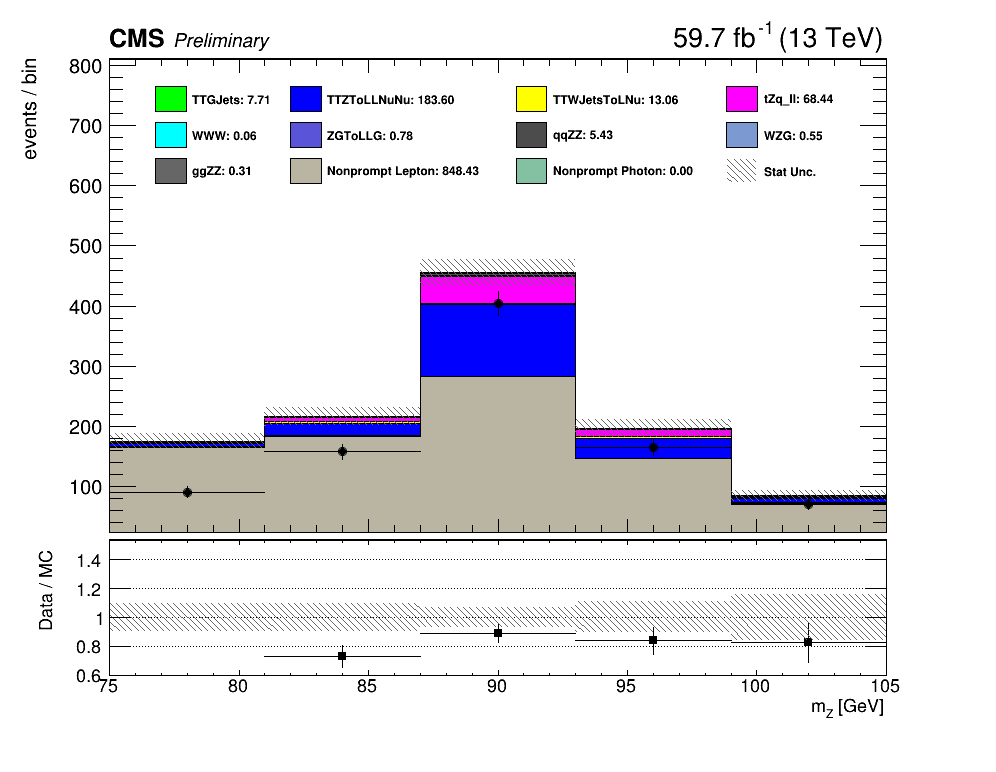

In [429]:
plot_branch = "ttZ_dileptonmass"

c1 = ROOT.TCanvas("","",1000,800)

MC_err = ROOT.TH1D("","",branch[plot_branch]["xbins"],branch[plot_branch]["xleft"],branch[plot_branch]["xright"])
ggZZ_sum = ROOT.TH1D("","",branch[plot_branch]["xbins"],branch[plot_branch]["xleft"],branch[plot_branch]["xright"])
SetHistStyle(ggZZ_sum, filelist_MC["ggZZ_4e"]["color"])
MC_err.Sumw2()
MC_err.SetFillColor(ROOT.kGray+2)
MC_err.SetFillStyle(3345)
MC_err.SetMarkerSize(0.)
MC_err.SetMarkerColor(ROOT.kGray+2)
MC_err.SetLineWidth(2)
MC_err.SetLineColor(0)
MC_err.SetStats(0)
MC_err.SetXTitle(f'{branch[plot_branch]["axis_name"]}')
MC_err.SetYTitle(f'events / bin')

stack_mc = ROOT.THStack("","")
MC_err.Add(hist_FakeLep[plot_branch])
stack_mc.Add(hist_FakeLep[plot_branch])
MC_err.Add(hist_FakePho[plot_branch])
stack_mc.Add(hist_FakePho[plot_branch])
for file in filelist_MC:
    if 'ggZZ' in file:
        ggZZ_sum.Add(filelist_MC[file]["hist"][plot_branch])
        continue
    
    if 'WZG' in file:
        continue
        
    stack_mc.Add(filelist_MC[file]["hist"][plot_branch])
    MC_err.Add(filelist_MC[file]["hist"][plot_branch])
    
stack_mc.Add(ggZZ_sum)
MC_err.Add(ggZZ_sum)
stack_mc.Add(filelist_MC['WZG']["hist"][plot_branch])
MC_err.Add(filelist_MC['WZG']["hist"][plot_branch])


legend = ROOT.TLegend(0.15, 0.65, 0.85, 0.85)
legend.SetNColumns(4)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.025)
legend.SetLineWidth(1)
legend.SetLineStyle(0)
for file in filelist_MC:
    if 'ggZZ' in file:
        continue
    if 'WZG' in file:
        continue
    legend.AddEntry(filelist_MC[file]["hist"][plot_branch], f'{filelist_MC[file]["name"]}: {format(filelist_MC[file]["hist"][plot_branch].GetSumOfWeights(), ".2f")}','F')
    
legend.AddEntry(filelist_MC["WZG"]["hist"][plot_branch], f'{filelist_MC["WZG"]["name"]}: {format(filelist_MC[file]["hist"][plot_branch].GetSumOfWeights(), ".2f")}','F')
legend.AddEntry(ggZZ_sum,f'ggZZ: {format(ggZZ_sum.GetSumOfWeights(), ".2f")}', 'F')
legend.AddEntry(hist_FakeLep[plot_branch],f'Nonprompt Lepton: {format(hist_FakeLep[plot_branch].GetSumOfWeights(), ".2f")}', 'F')
legend.AddEntry(hist_FakePho[plot_branch],f'Nonprompt Photon: {format(hist_FakePho[plot_branch].GetSumOfWeights(), ".2f")}', 'F')
legend.AddEntry(MC_err, 'Stat Unc.', 'F')
# legend.AddEntry(hist_data[plot_branch], f'data: {format(hist_data[plot_branch].GetSumOfWeights(), ".2f")}')



c1.Draw()
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.015)  # joins upper and lower plot
# pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c1.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.3)
pad2.SetGridy()
pad2.Draw()

# draw everything
pad1.cd()
hist_data[plot_branch].Draw("ep")
# hist_data.SetMinimum(10)
hist_data[plot_branch].SetMaximum(2.0*hist_data[plot_branch].GetMaximum())
hist_data[plot_branch].GetXaxis().SetLabelSize(0)
# MC_err.Draw("e2")
MC_err.SetMaximum(2.0 * MC_err.GetMaximum())
stack_mc.Draw("HIST SAME")
MC_err.Draw("e2 SAME")
hist_data[plot_branch].Draw("ep SAME")
legend.Draw("SAME")
# ROOT.gPad.SetLogy()
ROOT.gPad.RedrawAxis()


# h1.GetXaxis().SetLabelSize(0)
pad2.cd()
h3 = createRatio(hist_data[plot_branch], MC_err)
h4 = createRatio(MC_err, MC_err)
h3.Draw("ep")
h3.GetXaxis().SetRangeUser(10,60)
# h4.Draw("e2")
h4.Draw("e2 SAME")
ROOT.gPad.RedrawAxis()

CMS_lumi(pad1, 0, 0)
# c1.SaveAs('Fake_Lepton/MT_LooseMuon_dist_MR_2018.pdf')
print (time.time()-time_total_init)

## Prepare Histogram for combination

In [430]:
CR_branch = "dileptonmass"
year = "2018"
active = 0

CR_name = {
    0:"wza",
    10:"t_enriched",
    9:"ZZ"
}

UpDown_map={
    0:None,
    1:"JESup",
    2:"JESdown",
    3:"JERup",
    4:"JERdown"
}

def WriteFile(CR_name, year, UpDown):
    Top_store = ROOT.TH1D("","",branch[plot_branch]["xbins"],branch[plot_branch]["xleft"],branch[plot_branch]["xright"])
    VV_store = ROOT.TH1D("","",branch[plot_branch]["xbins"],branch[plot_branch]["xleft"],branch[plot_branch]["xright"])
    SetHistStyle(Top_store, filelist_MC["TTZ"]["color"])
    SetHistStyle(VV_store, filelist_MC["ggZZ_4e"]["color"])
    if UpDown:
        file_combine = ROOT.TFile(f"Combine/{CR_name}_{year}.root", "UPDATE")
    else:
        file_combine = ROOT.TFile(f"Combine/{CR_name}_{year}.root", "RECREATE")
    file_combine.cd()

    for file in filelist_MC:
        if ('TT' in file) or ('tZq' in file):
            Top_store.Add(filelist_MC[file]["hist"][plot_branch])
            continue
        if ('qqZZ' in file) or ('ggZZ' in file) or ('ZGToLLG' in file):
            VV_store.Add(filelist_MC[file]["hist"][plot_branch])
            continue
        if UpDown:
            filelist_MC[file]["hist"][plot_branch].SetName(f'{filelist_MC[file]["name"]}_{CR_branch}_{UpDown}')
        else:
            filelist_MC[file]["hist"][plot_branch].SetName(f'{filelist_MC[file]["name"]}_{CR_branch}')
        filelist_MC[file]["hist"][plot_branch].Write()

    if UpDown:
        VV_store.SetName(f"VV_{CR_branch}_{UpDown}")
        Top_store.SetName(f"Top_{CR_branch}_{UpDown}")
        hist_FakeLep[plot_branch].SetName(f"FakeLep_{CR_branch}_{UpDown}")
        hist_FakePho[plot_branch].SetName(f"FakePho_{CR_branch}_{UpDown}")
        hist_data[plot_branch].SetName(f"data_{CR_branch}_{UpDown}")
    else:
        VV_store.SetName(f"VV_{CR_branch}")
        Top_store.SetName(f"Top_{CR_branch}")
        hist_FakeLep[plot_branch].SetName(f"FakeLep_{CR_branch}")
        hist_FakePho[plot_branch].SetName(f"FakePho_{CR_branch}")
        hist_data[plot_branch].SetName(f"data_{CR_branch}")
        

    VV_store.Write()
    Top_store.Write()
    hist_FakePho[plot_branch].Write()
    hist_FakeLep[plot_branch].Write()
    hist_data[plot_branch].Write()


    file_combine.Close()
    
    
if active == 1:
    if channel in [0,9,10]:
        WriteFile(CR_name[channel], year, UpDown_map[UpDown])